# Projeto 2 

Renan de Oliveira da Cruz, Nº USP 10801090

Bacharelado em Estatística e Ciência de Dados

email: r_oliveira@usp.br

github: https://github.com/nan-oliveira

<br>

Giovana Daniele da Silva, Nº USP 10692224

Bacharelado em Ciências de Computação

email: giovana.daniele@usp.br

github: https://github.com/giovanadanieles

## 1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1, 10] e mostre o gráfico da média em função da variância.

Uma variável aleatória $X$ tem distribuição Poisson se a sua função massa de probabilidade poder ser escrita como:

$$f(x ; \lambda)=\frac{e^{-\lambda} \lambda^{x}}{x !}, x = 0, 1, 2, 3, ...$$

Não é difícil verificar que $\mathbb{E}[X] = \lambda = \mathbb{Var}[X]$.

Primeiramente, segue a geração de amostras:

In [ ]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Fixando a semente
np.random.seed(2000)

In [ ]:
dados_poisson = pd.DataFrame()

# Cada amostra tem tamanho 30
for i in np.arange(1, 10.5, 0.5):
  dados_poisson['Lambda_' + str(i)] = pd.Series(np.random.poisson(i, 30))

dados_poisson.head(5)

,Lambda_1.0,Lambda_1.5,Lambda_2.0,Lambda_2.5,Lambda_3.0,Lambda_3.5,Lambda_4.0,Lambda_4.5,Lambda_5.0,Lambda_5.5,Lambda_6.0,Lambda_6.5,Lambda_7.0,Lambda_7.5,Lambda_8.0,Lambda_8.5,Lambda_9.0,Lambda_9.5,Lambda_10.0
0,1,2,3,1,4,7,7,3,4,3,5,11,5,10,4,5,13,11,9
1,1,3,5,0,4,4,5,3,8,5,3,5,11,6,11,14,5,16,6
2,1,3,3,4,4,4,5,2,3,4,6,5,2,3,15,6,12,9,12
3,0,6,0,4,2,3,5,4,3,3,10,2,6,4,5,9,11,7,12
4,1,1,3,4,5,5,7,3,4,6,10,7,5,9,13,12,9,7,9


Calculo das médias e variâncias:

In [ ]:
media = dados_poisson.apply(np.mean)
variancia = dados_poisson.apply(np.var)

dados = pd.DataFrame()
dados['media'] = media
dados['variancia'] = variancia

dados.head(5)

,media,variancia
Lambda_1.0,0.866667,0.782222
Lambda_1.5,2.166667,2.205556
Lambda_2.0,2.233333,1.978889
Lambda_2.5,2.733333,2.528889
Lambda_3.0,2.866667,2.515556


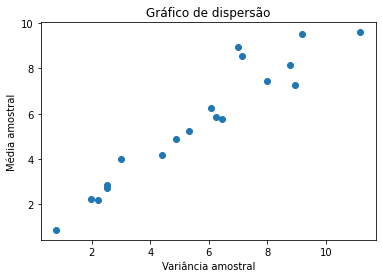

In [ ]:
plt.scatter(variancia, media)

plt.xlabel('Variância amostral')
plt.ylabel('Média amostral')
plt.title('Gráfico de dispersão')

plt.show()

Do ponto de vista teórico tem-se que a variância da distribuição Poisson é igual a sua própria média. Devido a tal característica tem-se que, conforme ocorra um aumento na média dos valores gerados também ocorerá um aumento na dispersão dos dados (variância).

Segue abaixo, juntamente com o gráfico de dispersão, uma reta de mínimos quadrados.

A reta de mínimos quadrados pode ser dada por:

$$y = \hat{\beta_1} \cdot x + \hat{\beta}_0$$

Em que $$\widehat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(Y_{i}-\bar{Y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}$$ e $$\widehat{\beta}_{0}=\bar{Y}-\widehat{\beta}_{1} \bar{x}$$

considerando como $x$ a variância amostral e $Y$ a média amostral.

beta0: 0.6437218842206063
beta1: 0.8848898693126508


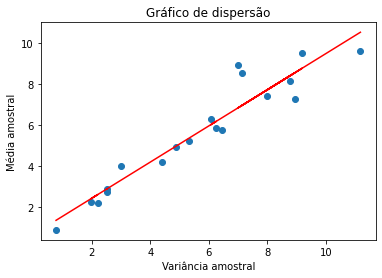

In [ ]:
beta1 = sum((dados.variancia - np.mean(dados.variancia))*(dados.media - np.mean(dados.media))) / sum((dados.variancia - np.mean(dados.variancia))**2)
beta0 = np.mean(dados.media) - beta1 * np.mean(dados.variancia)

print('beta0:', beta0)
print('beta1:', beta1)

plt.scatter(variancia, media)
plt.xlabel('Variância amostral')
plt.ylabel('Média amostral')
plt.title('Gráfico de dispersão')
plt.plot(dados.variancia, beta1 * dados.variancia + beta0, 'r-')
plt.show()

Em seguida tem-se o cálculo de dois coeficientes de correlação:

In [ ]:
print('Coeficiente de correlação de Pearson: ',pearsonr(dados.media, dados.variancia)[0])
print('Coeficiente de correlação de Spearman: ', spearmanr(dados.media, dados.variancia)[0])

Coeficiente de correlação de Pearson:  0.9538736724154849
Coeficiente de correlação de Spearman:  0.956140350877193


A partir do gráfico acima conclui-se que a variância amostral e a média amostral estão linearmente fortemente correlacionadas, fato que é corroborado pelo cálculo dos coeficientes de correlação de Pearson e de Spearman. Ambos os coeficientes resultaram em valores "altos", próximos de 1. Esse resultado se justifica pelo fato de que a média teórica e a variância teórica são iguais; sendo assim, aumentando a média aumenta-se também a dispersão dos dados. Devido à mesma justificativa, pode-se observar, via análise gráfica, que os pontos se aproximam da reta identidade, fazendo com que seja possível afirmar que a variância amostral e a média amostral são concordantes.  

## 2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [ ]:
# Bibliotecas utilizadas 

import pandas as pd
import numpy as np
from scipy.stats import iqr

Carregando os dados e verificando se os mesmos foram carregados corretamente:

In [ ]:
data = pd.read_csv('/content/aula3_data/iris.csv', header=(0))

data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Calculando a média de cada atributo:

In [ ]:
data_sl = data.drop(data.columns[[1, 2, 3, 4]], axis = 1) # Selecionando apenas o atributo sepal_length
data_sw = data.drop(data.columns[[0, 2, 3, 4]], axis = 1) # Selecionando apenas o atributo sepal_width
data_pl = data.drop(data.columns[[0, 1, 3, 4]], axis = 1) # Selecionando apenas o atributo petal_length
data_pw = data.drop(data.columns[[0, 1, 2, 4]], axis = 1) # Selecionando apenas o atributo petal_width

# Transformando em um array do tipo float
data_sl_array = np.array(data_sl, dtype = float) 
data_sw_array = np.array(data_sw, dtype = float) 
data_pl_array = np.array(data_pl, dtype = float) 
data_pw_array = np.array(data_pw, dtype = float) 

In [ ]:
# Imprimindo resultados:
print("Média do atributo sepal length:  ", np.mean(data_sl_array))
print("Média do atributo sepal width:   ", np.mean(data_sw_array))
print("Média do atributo petal length:  ", np.mean(data_pl_array))
print("Média do atributo petal width:   ", np.mean(data_pw_array))


Média do atributo sepal length:   5.843333333333334
Média do atributo sepal width:    3.0540000000000003
Média do atributo petal length:   3.758666666666666
Média do atributo petal width:    1.1986666666666668


Calculando a variância de cada atributo:



In [ ]:
# Imprimindo resultados:
print("Variância do atributo sepal length:  ", np.var(data_sl_array, ddof = 1)) # var amostral
print("Variância do atributo sepal width:   ", np.var(data_sw_array, ddof = 1))
print("Variância do atributo petal length:  ", np.var(data_pl_array, ddof = 1))
print("Variância do atributo petal width:   ", np.var(data_pw_array, ddof = 1))

Variância do atributo sepal length:   0.6856935123042507
Variância do atributo sepal width:    0.1880040268456376
Variância do atributo petal length:   3.113179418344519
Variância do atributo petal width:    0.582414317673378


Calculando o IQR de cada atributo:

In [ ]:
# Imprimindo resultados:
print("IQR do atributo sepal length:  ", iqr(data_sl_array))
print("IQR do atributo sepal width:   ", iqr(data_sw_array))
print("IQR do atributo petal length:  ", iqr(data_pl_array))
print("IQR do atributo petal width:   ", iqr(data_pw_array))

IQR do atributo sepal length:   1.3000000000000007
IQR do atributo sepal width:    0.5
IQR do atributo petal length:   3.4999999999999996
IQR do atributo petal width:    1.5


Vale ressaltar que o atributo *species* foi desconsiderado pois as medidas pedidas não se aplicam a atributos qualitativos nominais.

## 3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

In [ ]:
# Importando bibliotecas
import seaborn as sns
import pandas as pd

Segue abaixo o boxplot de todas as variáveis do dataset iris, para cada espécie:

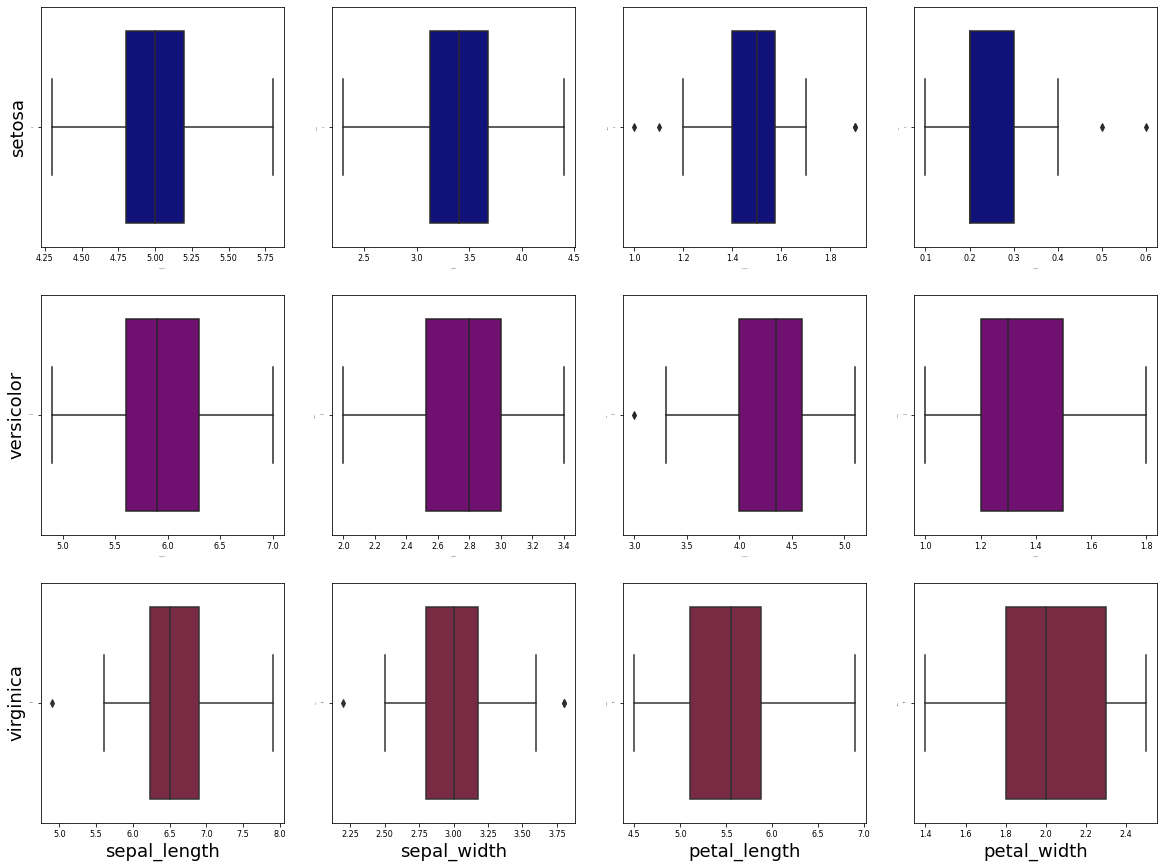

In [ ]:
plt.figure(figsize=(20,15))

# Recebendo os dados em um dataframe do Pandas
data = pd.read_csv('/content/aula3_data/iris.csv', header = (0))

# Separando os dados em dataframes específicos para cada espécie
data_setosa = data[data.species == 'setosa']
data_versicolor = data[data.species == 'versicolor']
data_virginica = data[data.species == 'virginica']

# Rótulos auxiliares para legenda do gráfico
xValues = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
yValues = ['setosa', 'versicolor', 'virginica']

for i in range(len(xValues) * len(yValues)):
  plt.subplot(3, 4, i + 1)

  # Configurando os gráficos; os ifs foram usados para definir diferentes cores
  if i == 0 or i == 1 or i == 2 or i == 3:
    sns.boxplot(x = xValues[i % len(xValues)], y = 'species', data = data_setosa, color='darkblue')
  elif i == 4 or i == 5 or i == 6 or i == 7:
    sns.boxplot(x = xValues[i % len(xValues)], y = 'species', data = data_versicolor, color='purple')
  else:
    sns.boxplot(x = xValues[i % len(xValues)], y = 'species', data = data_virginica, color='#851e3e')

  # Colocando legenda no eixo x apenas no extremo inferior do plot
  if i == 8 or i == 9 or i == 10 or i == 11:
    plt.xlabel(xValues[i % len(xValues)], fontsize=18)
  else: 
    plt.xlabel(xValues[i % len(xValues)], fontsize=0)

  # Colocando legenda no eixo y apenas no extremo esquerdo do plot
  if i == 0 or i == 4 or i == 8: 
    plt.ylabel(yValues[i % len(yValues)], fontsize=18)
  else:
    plt.ylabel(yValues[i % len(yValues)], fontsize=0)
  
  # Habilitando os valores numéricos no eixo x para cada boxplot
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=0)

# Exibindo os boxplots gerados
plt.show(True)

É possível observar, nos boxplots acima, a presença de outliers para os dados estratificados em pares <sepal_length, virginica>, <sepal_width, virginica>, <petal_length, versicolor>, <petal_length, setosa>, <petal_width, setosa>.

## 4 - Para a função $log()$, investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

Para fazer a análise de acordo com o intervalo dos dados, optamos por selecionar 4 intervalos para x: $[1, 1000]$, $[1000, 5000]$, $[5000, 10000]$ e $[10000, 15000]$. 

Com base nos resultados, compararemos as correlações de Pearson e Spearman.

In [ ]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

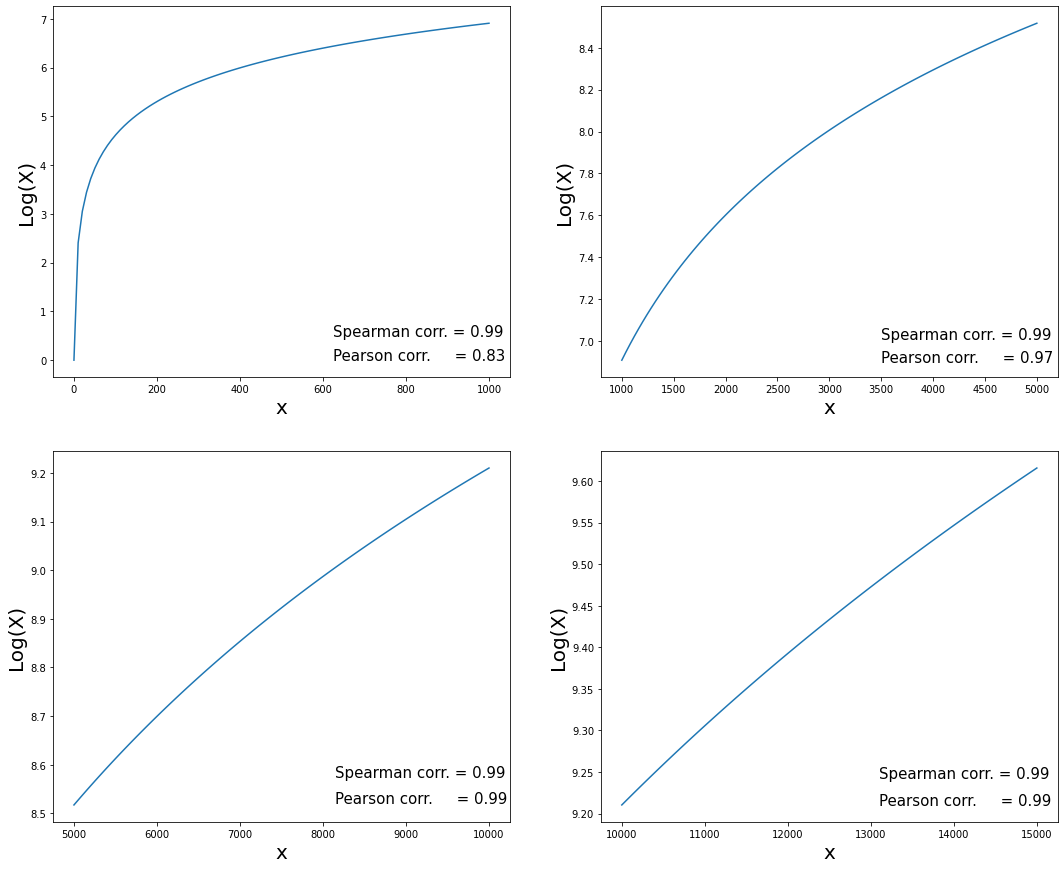

In [ ]:
avalues = [1, 1000, 5000, 10000]
bvalues = [1000, 5000, 10000, 15000]

N = 100

plt.figure(figsize=(18,15))

for i in range(len(bvalues)):

  x = np.linspace(avalues[i], bvalues[i], N) 
  z = np.log(x)
 
  plt.subplot(2, 2, i + 1)

  plt.plot(x, z) 
  plt.xlabel("x",fontsize = 20) 
  plt.ylabel("Log(X)", fontsize = 20) 
  corr, p_value = pearsonr(x, z)
  corrs, p_values = spearmanr(x, z)
  corr = int(corr*100)/100
  corrs = int(corrs*100)/100

  stringP = 'Pearson corr.     = '+ str(corr)
  stringS = 'Spearman corr. = '+ str(corrs)

  if i == 0:
    plt.text(625, 0, stringP, fontsize=15)
    plt.text(625, 0.5, stringS, fontsize=15)
  elif i == 1:
    plt.text(3500, 6.9, stringP, fontsize=15)
    plt.text(3500, 7.01, stringS, fontsize=15)
  elif i == 2:
    plt.text(8150, 8.52, stringP, fontsize=15)
    plt.text(8150, 8.575, stringS, fontsize=15)
  elif i == 3:
    plt.text(13100, 9.21, stringP, fontsize=15)
    plt.text(13100, 9.243, stringS, fontsize=15)

plt.show()

No **primeiro intervalo**, de $[1, 1000]$, é possível verificar que o coeficiente de correlação de Pearson é consideravelmente menor que o coeficiente de correlação de Spearman. Isso pode ser explicado pelo fato de a função logarítimica, que é **não linear**, crescer rapidamente no intervalo e a correlação de Pearson só medir correlações lineares. O coeficiente de Spearman, por outro lado, avalia a relação **monotônica** entre duas variáveis contínuas ou ordinais, o que se aplica bem ao exemplo: das quatro janelas selecionadas, essa é a que melhor exprime a não-linearidade da função $log()$, que pode ser descrita como uma função monotônica crescente.

Ainda, vale acrescentar que o valor considerável do coeficiente de Pearson $(0.83)$ pode ser explicado pela forte correlação entre $x$ e seus respectivos logaritmos, conquanto a relação apresentada não seja linear.

No **segundo intervalo** a função passa a crescer mais lentamente, assumindo uma forma semelhante às das funções lineares (embora a mesma não seja linear). Em função disso, o coeficiente de correlação de Pearson cresce consideravelmente e assume um valor muito próximo ao do coeficiente de correlação de Spearman.

Por fim, no **terceiro e quarto intervalos**, o mesmo comportamento recentemente descrito se repete — neles, a função logarítimica poderia até mesmo ser confundida, sem uma análise cuidadosa e apenas com a observação da curva, com uma função linear. Aqui, os coeficientes de correlação de Spearman e de Pearson passam a apresentar o mesmo valor se considerada precisão de duas casas decimais.   

## 5 - Considere o código que mostra como a correlação de Pearson muda com a inclusão de ruídos (ver Python: Análise Exploratória de Dados). Modifique a função para Y = 0.5 $\cdot$ X + ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

Assumindo que os ruídos possuem distribuição gama.

Uma variável aleatória $X$ tem distribuição Gama com parâmetros $\alpha$ e $\beta$ ($X \sim Gama(\alpha, \beta)$) se a sua função densidade de probabilidade puder ser escrita na forma:

$$ f(x; \alpha, \beta) = \frac{\beta^{\alpha} x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}, \text{para }x, \alpha, \beta > 0$$

Daí, vem $$\mathbb{E}[X] = \frac{\alpha}{\beta}$$ e $$\mathbb{Var}[X] = \frac{\alpha}{\beta^2}$$




Dessa maneira, fixar-se-á o parâmetro $\alpha$ em 0.5, enquanto que o parâmetro $\beta$ poderá assumir diferentes valores (20, 10, 5, 2, 1, 0.1). Isso tem por finalidade gerar ruídos com diferentes variâncias.

Logo, cada gráfico abaixo pode ser descrito como:

$$Y = 0.5 \cdot x + \epsilon$$

Em que $\epsilon \sim Gama(0.5, \beta)$.

Para diferentes valores de beta, temos diferentes variâncias para o ruído, assim a variância de cada ruido é:


In [ ]:
for aux in [20, 10, 5.0, 2.0, 1, 0.1]:
  print('Para β igual a', aux, 'a variância é', 0.5/aux**2)

Para β igual a 20 a variância é 0.00125
Para β igual a 10 a variância é 0.005
Para β igual a 5.0 a variância é 0.02
Para β igual a 2.0 a variância é 0.125
Para β igual a 1 a variância é 0.5
Para β igual a 0.1 a variância é 49.99999999999999


In [ ]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

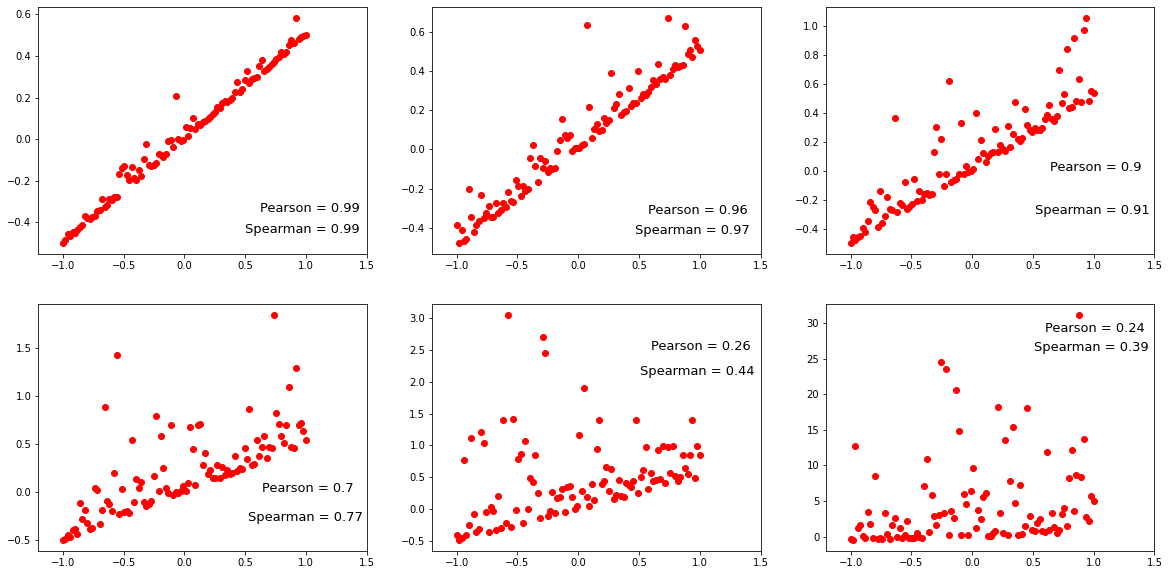

In [ ]:
np.random.seed(19)

plt.figure(figsize=(20,10))

N = 100
X = np.linspace(-1,1, N)
i = 0
for aux in [20, 10, 5, 2, 1, 0.1]:
    plt.subplot(2, 3, i + 1)
    i = i + 1
    # 1/aux para que a parametrização da dist gama fique de acordo com a densidade apresentada acima
    erro = np.random.gamma(0.5,1/aux, N) 
    Y = 0.5*X + erro
    plt.plot(X,Y, 'ro')
    pearson = round(pearsonr(X, Y)[0], 2)
    spearman = round(spearmanr(X, Y)[0], 2) 
    string1 = 'Pearson = '+ str(pearson)
    string2 = 'Spearman = '+ str(spearman)
    plt.xlim(-1.2,1.5)
    if i == 1:
      plt.text(0.62,-0.35, string1, fontsize=13)
      plt.text(0.50,-0.45, string2, fontsize=13)
    elif i == 2:
      plt.text(0.57,-0.33, string1, fontsize=13)
      plt.text(0.47,-0.43, string2, fontsize=13)
    elif i == 3 or i == 4:
      plt.text(0.64,0.0, string1, fontsize=13)
      plt.text(0.52,-0.3, string2, fontsize=13)
    elif i == 5:
      plt.text(0.6, 2.5, string1, fontsize=13)
      plt.text(0.51, 2.1, string2, fontsize=13)
    else:
      plt.text(0.6, 28.7, string1, fontsize=13)
      plt.text(0.51, 26, string2, fontsize=13)

plt.show(True)

Por meio dos gráficos acima percebe-se que para ruídos com baixa variância os coeficientes de Pearson e Spearman são bem próximos e "altos" (fato que pode ser observado nos dois primeiros gráficos do canto superior esquerdo). Conforme tem-se um aumento da variância, ambos coeficientes de correlação diminuem, todavia, o coeficiente de correlação de Pearson diminui mais rapidamente do que o de Spearman. Isso ocorre devido ao fato de que, conforme aumenta-se variância do ruído, aumenta-se também a probabilidade de gerar valores "mais extremos" (mais distantes da moda) e, por usar momentos estatísticos, a correlação de Pearson é mais sensível a isso, enquanto que, por usar o posto (*rank*), o coeficiente de Spearman é mais robusto a "valores distantes". 

## 6 - Considere os dados abaixo, chamado quarteto de Anscombe. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

In [ ]:
# Importando bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

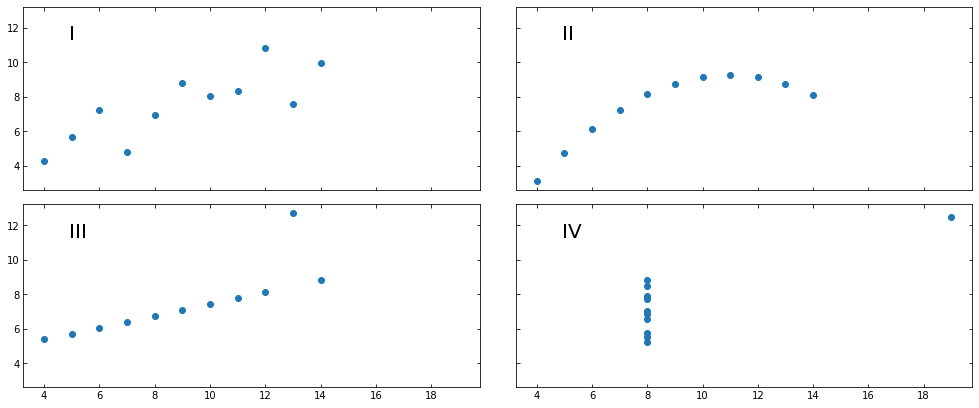

In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(17, 7),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})


for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

plt.show()



Primeiro, salvemos os dados em um dataframe do Pandas:

In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

df_anscombe = pd.DataFrame(data = np.array([x, y1, y2, y3, x4, y4]).transpose(), columns=["x", "y1", "y2", "y3", "x4", "y4"])

df_anscombe.head(11)

,x,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47
5,14.0,9.96,8.10,8.84,8.0,7.04
6,6.0,7.24,6.13,6.08,8.0,5.25
7,4.0,4.26,3.10,5.39,19.0,12.50
8,12.0,10.84,9.13,8.15,8.0,5.56
9,7.0,4.82,7.26,6.42,8.0,7.91


Calculando a média:

In [ ]:
df_anscombe.mean()

x     9.000000
y1    7.500909
y2    7.500909
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

Calculando a variância:

In [ ]:
df_anscombe.var(ddof = 1) # var amostral

x     11.000000
y1     4.127269
y2     4.127629
y3     4.122620
x4    11.000000
y4     4.123249
dtype: float64

*Overview* dos coeficientes de correlação (Pearson e Spearman):

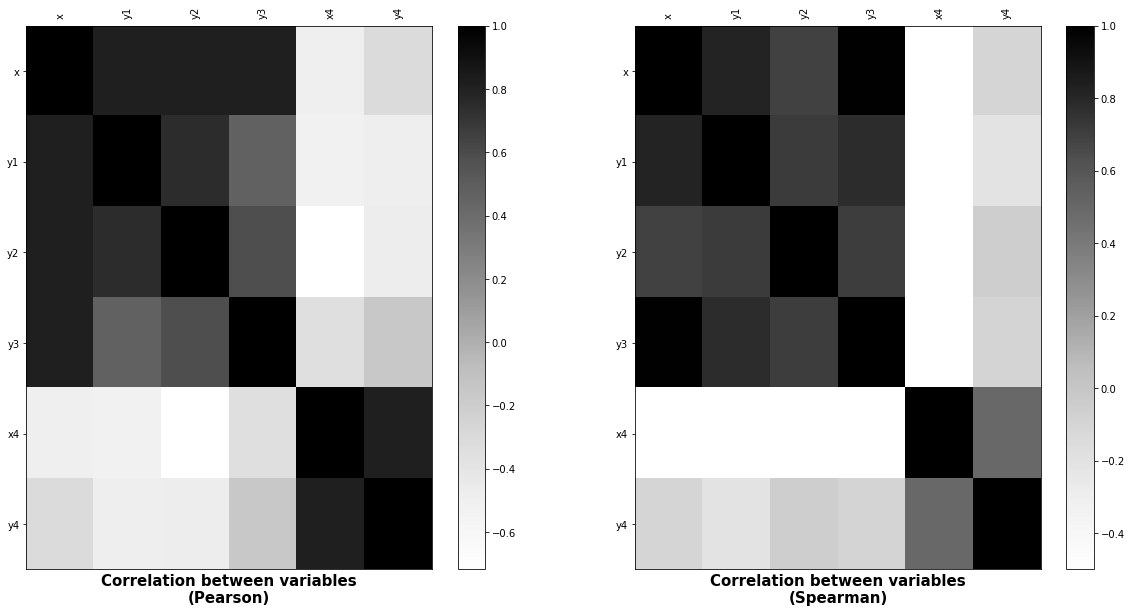

In [ ]:
plt.figure(figsize=(20, 10))

corrP = df_anscombe.corr(method = 'pearson')

#Plot Correlation Matrix using Matplotlib - Pearson
plt.subplot(1, 2, 1)
plt.imshow(corrP, cmap='Greys', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corrP)), corrP.columns, rotation='vertical')
plt.yticks(range(len(corrP)), corrP.columns);
plt.xlabel('Correlation between variables\n(Pearson)', fontsize=15, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.grid(False)

corrS = df_anscombe.corr(method = 'spearman')

#Plot Correlation Matrix using Matplotlib - Spearman
plt.subplot(1, 2, 2)
plt.imshow(corrS, cmap='Greys', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corrS)), corrS.columns, rotation='vertical')
plt.yticks(range(len(corrS)), corrS.columns);
plt.xlabel('Correlation between variables\n(Spearman)', fontsize=15, fontweight='bold', verticalalignment ="top")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.grid(False)

plt.show()

Obtendo os valores dos coeficientes de correlação de Pearson e Spearman:

In [ ]:
avalues = ["x", "x", "x", "x4"]
bvalues = ["y1", "y2", "y3", "y4"]

for i in range(len(avalues)):
  print("Coeficiente de correlação de Pearson entre", avalues[i], "e", bvalues[i], ":",
        pearsonr(df_anscombe[avalues[i]], df_anscombe[bvalues[i]])[0])
  print("Coeficiente de correlação de Spearman entre", avalues[i], "e", bvalues[i], ":",
        spearmanr(df_anscombe[avalues[i]], df_anscombe[bvalues[i]])[0], "\n")

Coeficiente de correlação de Pearson entre x e y1 : 0.81642051634484
Coeficiente de correlação de Spearman entre x e y1 : 0.8181818181818182 

Coeficiente de correlação de Pearson entre x e y2 : 0.8162365060002427
Coeficiente de correlação de Spearman entre x e y2 : 0.690909090909091 

Coeficiente de correlação de Pearson entre x e y3 : 0.8162867394895982
Coeficiente de correlação de Spearman entre x e y3 : 0.990909090909091 

Coeficiente de correlação de Pearson entre x4 e y4 : 0.8165214368885029
Coeficiente de correlação de Spearman entre x4 e y4 : 0.5 



Primeiro, é interessante entender o que é o Quarteto de Anscombe: se trata de quatro conjuntos de dados que possuem **estatísticas descritivas** semelhantes (média, variância e coeficientes de correlação de Pearson e Spearman), mas que possuem aparências distintas quando exibidas graficamente. 

O Quarteto de Anscombe foi construído pelo estatístico Francis Anscombe, com o objetivo de demonstrar:
<ol>
  <li>A importância de se visualizar graficamente os dados antes de se efetuar a análise; </li>
  <li>O efeito de outliers e outras observações influentes nas propriedades estatísticas.</li>
</ol>

Nesse sentido, é possível fazer algumas observações. Apesar dos quatro gráficos apresentados serem consideravelmente diferentes (o que pode levar a pensar que os dados utilizados em sua construção não partilham semelhança quanto às medidas descritivas), tem-se que:
<ul>
  <li>A média de $x$ e de $x_4$ é a mesma: $9.0$;</li>
  <li>A variância de $x$ e de $x_4$ é a mesma: $11.0$;</li>
  <li>A média de $y_1$, $y_2$, $y_3$ e $y_4$ é a mesma se considerada precisão de duas casas decimais: $7.50$;</li>
  <li>A variância de $y_1$, $y_2$, $y_3$ e $y_4$ é a mesma, se considerado um erro de $±0,003$: $4.125$;</li>
  <li>O coeficiente de correlação de Pearson entre $x$ e $y$ é o mesmo, se considerada precisão de duas casas decimais: $0.81$.</li>
</ul>

Ainda, no primeiro cenário, tem-se que os coeficientes de correlçao calculados sao semelhantes e "altos" (superiores a $0.8$). Isso, juntamente com o gráfico de dispersão, indica uma forte relação linear entre as variáveis $x$ e $y_1$. 

No segundo cenário, tem-se que o coeficiente de correlação de Pearson é superior a $0.8,$ o que indica uma forte relação linear. O coeficiente de correlação de Spearman, por sua vez, é um pouco menor (aproximadamente $0.69$). Visuamente é possível notar que as variáveis $x$ e $y_2$ não apresentam uma relação linear e que, possivelmente, uma relação quadrática explique melhor  a estrutura de correlação entre as duas variáveis.

No terceiro cenário, tem-se que ambos coeficientes de correlação são bem altos, ainda que o de Spearman seja consideravelmente mais alto do que o de Pearson ($0.99$ e $0.81$, respectivamente). Ainda, através da análise gráfica é possível notar a presença de um ponto discrepante dos demais, provavelmente um *outlier*, fato que explicaria o valor inferior do coeficiente de Pearson, que é mais sensível a *outliers*.

O quarto e último cenário é o que apresenta maior discrepância entre os coeficientes de correlacao ($0.82$ para o de Pearson e $0.5$ para o de Spearman). Nesse caso, a menos de uma observação, todas as demais possuem o mesmo valor em $x_4$, evidenciando o fato de que o coeficiente de Spearman é fortemente influenciado por empates (*ties*) na amostra, já que tal coeficiente é baseado no *rank* das observações.